In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

C:\Users\BRI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
#check sample df
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#check data type field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#check data null each field
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# rename
df.rename(
    columns={'emp.var.rate' : 'emp_var_rate',
             'cons.price.idx' : 'cons_price_idx',
             'cons.conf.idx' : 'cons_conf_idx',
             'nr.employed' : 'nr_employed'
            },
    inplace=True
)

In [7]:
# replace job 
df['job'].replace(['admin.'],'admin', inplace=True)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# define encoder
encoder = LabelEncoder()

df['job'] = encoder.fit_transform(df.job)
df['marital'] = encoder.fit_transform(df.marital)
df['education'] = encoder.fit_transform(df.education)
df['default'] = encoder.fit_transform(df.default)
df['housing'] = encoder.fit_transform(df.housing)
df['loan'] = encoder.fit_transform(df.loan)
df['contact'] = encoder.fit_transform(df.contact)
df['month'] = encoder.fit_transform(df.month)
df['day_of_week'] = encoder.fit_transform(df.day_of_week)
df['poutcome'] = encoder.fit_transform(df.poutcome)

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
feature_cols = [
    'age','duration','campaign','pdays','previous',
    'emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'
    
    ,'job','marital','education','default','housing','loan',
    'contact','month','day_of_week','poutcome'
]
X = df[feature_cols]
y = df['y']

In [12]:
# train the model

def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    
    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    
    print("------ training performance -----")
    print("target : ", y_train[:10])
    print("prediction : ", train_pred[:10])
    print("accuracy score : ", train_acc)
    
    print("------ test performance -----")
    print("target : ", y_test[:10])
    print("prediction : ", test_pred[:10])
    print("accuracy score : ", test_acc)
    
    print(classification_report(y_test, test_pred))

In [13]:
# split data training and data test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2,
    random_state = 0
)

print("training size : ", X_train.shape[0])
print("test size : ", X_test.shape[0])

training size :  32950
test size :  8238


In [14]:
# train the model 

logistics = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
svc = SVC()
dtree = DecisionTreeClassifier()
forest = RandomForestClassifier()
bayes = GaussianNB()

for model in [logistics, kkn, svc, dtree, forest, bayes]:
    print("Training : ", model.__class__)
    train_model(model, X_train, X_test, y_train, y_test)
    print('---------')

Training :  <class 'sklearn.linear_model.logistic.LogisticRegression'>


C:\Users\BRI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------ training performance -----
target :  29321     no
23925     no
39148    yes
12078     no
41021     no
9727      no
5584      no
28948     no
19108    yes
5108      no
Name: y, dtype: object
prediction :  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
accuracy score :  0.9091047040971169
------ test performance -----
target :  15500    yes
29034     no
11199     no
22247     no
27180     no
33831     no
961       no
10746     no
15195    yes
34319     no
Name: y, dtype: object
prediction :  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no']
accuracy score :  0.9153920854576354
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7319
         yes       0.68      0.45      0.54       919

    accuracy                           0.92      8238
   macro avg       0.81      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238

---------
Training :  <class 'sklearn.svm.classes.SVC'>


C:\Users\BRI\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


------ training performance -----
target :  29321     no
23925     no
39148    yes
12078     no
41021     no
9727      no
5584      no
28948     no
19108    yes
5108      no
Name: y, dtype: object
prediction :  ['no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no']
accuracy score :  0.9894385432473445
------ test performance -----
target :  15500    yes
29034     no
11199     no
22247     no
27180     no
33831     no
961       no
10746     no
15195    yes
34319     no
Name: y, dtype: object
prediction :  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
accuracy score :  0.8891721291575625
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7319
         yes       0.61      0.02      0.04       919

    accuracy                           0.89      8238
   macro avg       0.75      0.51      0.49      8238
weighted avg       0.86      0.89      0.84      8238

---------
Training :  <class 'sklearn.naive_bayes.GaussianNB'>
------ train

C:\Users\BRI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------ training performance -----
target :  29321     no
23925     no
39148    yes
12078     no
41021     no
9727      no
5584      no
28948     no
19108    yes
5108      no
Name: y, dtype: object
prediction :  ['no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no']
accuracy score :  0.9932321699544765
------ test performance -----
target :  15500    yes
29034     no
11199     no
22247     no
27180     no
33831     no
961       no
10746     no
15195    yes
34319     no
Name: y, dtype: object
prediction :  ['yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no']
accuracy score :  0.913814032532168
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7319
         yes       0.66      0.48      0.55       919

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.91      0.91      0.91      8238

---------
Training :  <class 'sklearn.neighbors.classification.KNeighborsC

In [17]:
# get the feature important
print("feature important:" , forest.feature_importances_)
print("features : ", feature_cols)

feature important: [0.09310536 0.30976398 0.04368717 0.04275044 0.01890856 0.04323874
 0.02623575 0.04046848 0.08036039 0.04365317 0.04855643 0.0240932
 0.04506372 0.00902732 0.01956501 0.01359882 0.01141502 0.01804974
 0.04065922 0.02779948]
features :  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [18]:
# feature important 
feature_imp = pd.Series(
    forest.feature_importances_, index=feature_cols
).sort_values(ascending=False)
feature_imp

duration          0.309764
age               0.093105
euribor3m         0.080360
job               0.048556
education         0.045064
campaign          0.043687
nr_employed       0.043653
emp_var_rate      0.043239
pdays             0.042750
day_of_week       0.040659
cons_conf_idx     0.040468
poutcome          0.027799
cons_price_idx    0.026236
marital           0.024093
housing           0.019565
previous          0.018909
month             0.018050
loan              0.013599
contact           0.011415
default           0.009027
dtype: float64

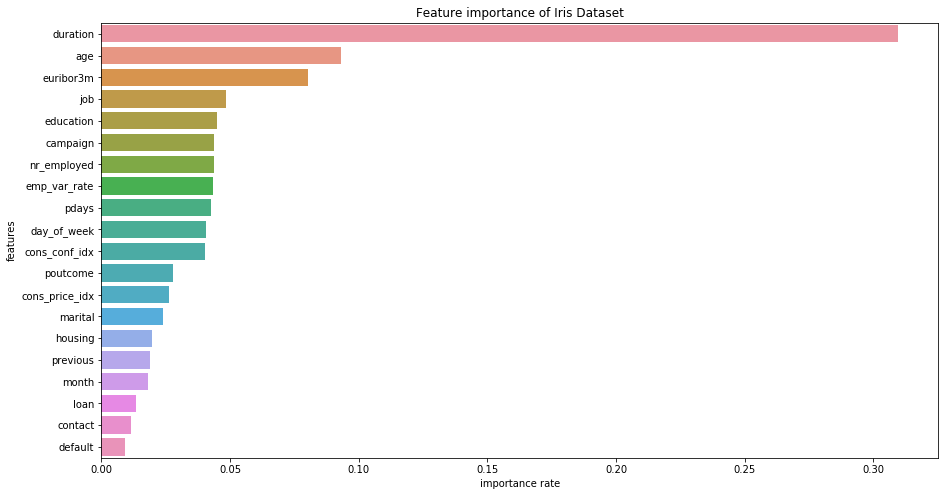

In [26]:
# plot feature importances

plt.figure(figsize=(15,8))
sns.barplot(feature_imp, y=feature_imp.index)
plt.title("Feature importance of Iris Dataset")
plt.xlabel("importance rate")
plt.ylabel("features")
plt.show()

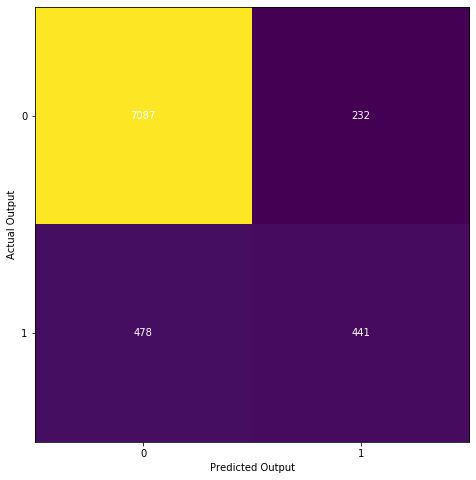

In [24]:
# plot confussion matrix

test_pred = forest.predict(X_test)
cm = confusion_matrix(y_test, test_pred)


fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted Output", color='black')
ax.set_ylabel("Actual Output", color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
plt.show()


# analysis
- logistics Regression 
 * training performance -> 0.9091
 * testing performance -> 0.9154
- SVM 
 * training performance -> 0.9894 
 * testing performance -> 0.8892 
- Naive Bayes
 * training performance -> 0.8452 
 * testing performance -> 0.8493 
- Random Forest 
 * training performance -> 0.9932 
 * testing performance -> 0.9138 
- KNN
 * training performance -> 0.9305 
 * testing performance -> 0.9073 
- Decision Tree
 * training performance -> 1 
 * testing performance -> 0.8929 
* sehingga dipilih random forest sebagai classifier yang paling tepat untuk memprediksi apakah customer akan mengapply deposito atau tidak berdasarkan 20 fitur yang tersedia yaitu job, age, marital, etc.